<h1 align="middle">Práctica 4</h1>

---
The objective of this exercise is to start using tools for the segmentation of images. In this case we will be segmetating the writing (letters/numbers) on a calculator.

In [1]:
#import the necessary libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt

---

### I. Histogram and thresholding

Read the image '*calculador.tif*' as a gray scale image and <font color=red>represent</font> it and answer this questions.

    - Are the keys all the same size? Which one is the biggest?
    - Do all the keys have writng (letters/numbers) in them? Are they connected?
    - Is there writing (letters/numbers) outside of the keys?
    - What writing (letters/numbers) is brighter the one inside or outside the keys?

In [3]:
%matplotlib notebook

calculator = cv2.imread('calculadora.TIF', 0)
plt.figure(1)
plt.imshow(calculator, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>

TypeError: Image data cannot be converted to float

Como sabe, el histograma de una imagen (función imhist) permite analizar la distribución
de niveles de intensidad. Represente el histograma de la imagen ‘calculadora.tif’ e indique
cuántas “crestas” se pueden identificar (tenga en cuenta que es posible que deba expandir el
eje de ordenadas para no tener saturación en la representación del histograma). Identifique
cada “cresta” del histograma con una etiqueta e indique qué zona de la imagen corresponde
con cada etiqueta. Puede resultar útil hacer uso de la función imtool (en la esquina inferior
izquierda de la representación proporciona el valor de intensidad del píxel sobre el que se
sitúa el cursor del ratón). 

Use the histogram of the image calculadora.tif to identify its different areas (the keys, writing and background).

<IPython.core.display.Javascript object>


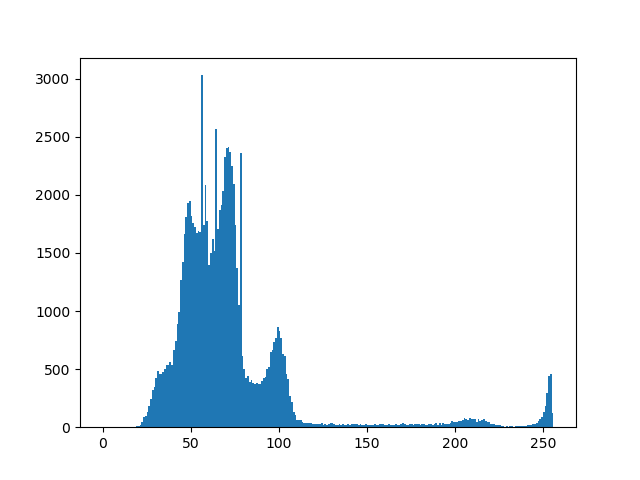

In [16]:
plt.figure('Histogram')
plt.hist(calculator.ravel(),256,[0,256]);

Determine razonadamente un nivel umbral que permita separar adecuadamente el interior de
las teclas del resto. Justifique el valor seleccionado y utilícelo para obtener una imagen
binaria (en adelante variable I_U) con el comando im2bw, mostrando el resultado obtenido
en una figura. 

Choose a value as a threshold that will separate the letters from the other elements. Use this value to get a binary image save this binary image in the variable I_U, show the result.

<IPython.core.display.Javascript object>


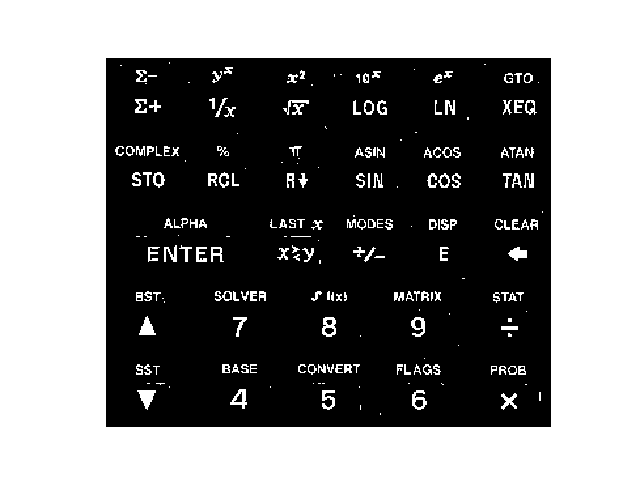

In [17]:
[thresh, I_U] = cv2.threshold(calculator, 127, 1, cv2.THRESH_BINARY)

plt.figure('Binary image')
plt.imshow(I_U, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

https://stackoverflow.com/questions/46441893/connected-component-labeling-in-python
https://docs.opencv.org/master/d3/dc0/group__imgproc__shape.html#gaedef8c7340499ca391d459122e51bef5
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
https://stackoverflow.com/questions/35854197/how-to-use-opencvs-connected-components-with-stats-in-python

II. Segmentación y caracterización de regiones
MATLAB proporciona la función bwlabel para realizar la segmentación de una imagen
binaria. Haga uso de la ayuda de esta función para indicar la vecindad considerada si se
utiliza la siguiente instrucción
[Seg_I_U, Nobjetos] = bwlabel(I_U);
Utilice la instrucción anterior para segmentar la imagen I_U. Para visualizar la etiqueta de
cada región haga uso de la función imtool como
imtool(Seg_I_U,[])
y pase el cursor del ratón sobre la región cuyo número de etiqueta desea conocer. El valor de
la etiqueta aparece en la esquina inferior izquierda, justo tras las coordenadas del píxel sobre
el que se sitúa el ratón.
La imagen en falso color que se genera a partir de la capa de segmentación (almacenada en
la variable Seg_I_U) se puede visualizar con las instrucciones
RGB_Segment = label2rgb(Seg_I_U);
figure, imshow(RGB_Segment)

41


<IPython.core.display.Javascript object>


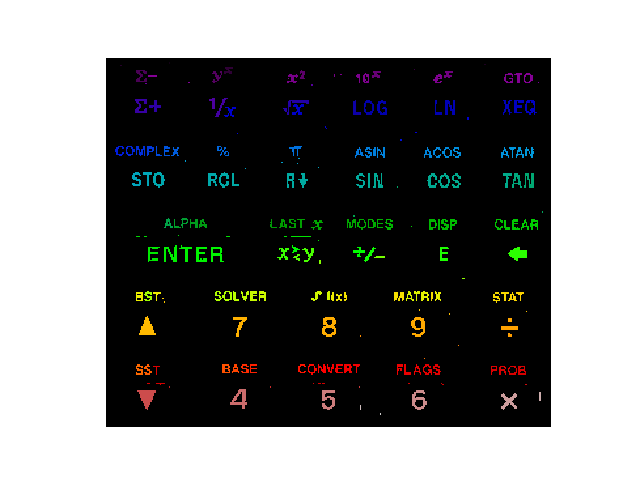

In [6]:
#Nobjects, Seg_I_U = cv2.connectedComponents(I_U)
Nobjects, Seg_I_U, stats, centroids=cv2.connectedComponentsWithStats(I_U)
print(stats[7, cv2.CC_STAT_AREA])

plt.figure('Segmented image')
plt.imshow(Seg_I_U, cmap=plt.cm.get_cmap('nipy_spectral'))
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

Teniendo en cuenta las instrucciones anteriores y sabiendo que cada
color identifica un objeto diferente, indique cuántos objetos se obtienen como resultado de la
segmentación. ¿Se obtiene un objeto por cada tecla? Como resultado de la segmentación, ¿se
han extraído objetos en la parte externa de las teclas?
Es posible analizar las propiedades de las regiones segmentadas para eliminar aquéllas que
no interesan, por ejemplo las regiones externas a las teclas (de tamaño muy reducido). La
función regionprops permite analizar determinadas propiedades de los objetos
segmentados. Esta función toma como uno de los argumentos de entrada la capa de etiquetas
obtenida de la segmentación (variable Seg_I_U), y como otro argumento la característica de
los objetos/regiones que se desea conocer. Puesto que estamos interesados en el tamaño de
los objetos consideraremos la propiedad 'Area', que proporciona el número de píxeles de
un objeto.
Haga uso de la ayuda de MATLAB para conocer qué otras propiedades se pueden obtener de
cada una de las regiones segmentadas. 

PARA NO LIDIAR CON STATS ENTERO METEMOS LAS AREAS EN UN ARRAY
https://docs.opencv.org/master/d3/dc0/group__imgproc__shape.html#gae57b028a2b2ca327227c2399a9d53241
https://docs.opencv.org/master/d3/dc0/group__imgproc__shape.html#gac7099124c0390051c6970a987e7dc5c5

[90933, 1, 1, 1, 1, 20, 1, 41, 30, 19, 21, 20, 33, 2, 1, 11, 27, 31, 30, 23, 29, 7, 1, 1, 1, 1, 1, 22, 34, 60, 31, 52, 29, 44, 46, 24, 59, 39, 41, 50, 36, 32, 2, 2, 2, 1, 1, 24, 27, 34, 28, 14, 24, 23, 30, 30, 23, 24, 13, 25, 22, 20, 23, 24, 22, 14, 24, 30, 1, 1, 1, 1, 1, 1, 45, 32, 53, 47, 46, 28, 49, 36, 37, 22, 42, 46, 46, 41, 28, 40, 52, 1, 1, 1, 25, 23, 14, 27, 22, 14, 22, 20, 18, 28, 32, 24, 24, 19, 27, 27, 8, 29, 21, 22, 19, 30, 21, 28, 1, 3, 2, 1, 3, 2, 16, 1, 58, 71, 50, 62, 67, 17, 31, 30, 47, 97, 37, 40, 12, 15, 3, 2, 25, 53, 20, 21, 31, 27, 25, 13, 21, 15, 31, 23, 26, 13, 11, 16, 10, 41, 12, 20, 18, 22, 14, 1, 1, 1, 1, 1, 109, 59, 97, 88, 9, 39, 8, 1, 1, 1, 23, 24, 31, 22, 25, 19, 19, 24, 27, 19, 21, 30, 12, 21, 16, 21, 28, 25, 11, 18, 27, 22, 27, 3, 8, 1, 2, 2, 1, 2, 2, 1, 1, 1, 115, 87, 81, 84, 75, 7, 4, 2]


<IPython.core.display.Javascript object>


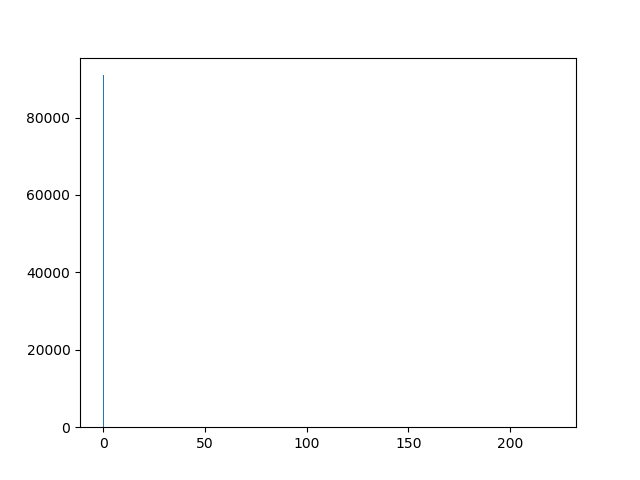

<IPython.core.display.Javascript object>


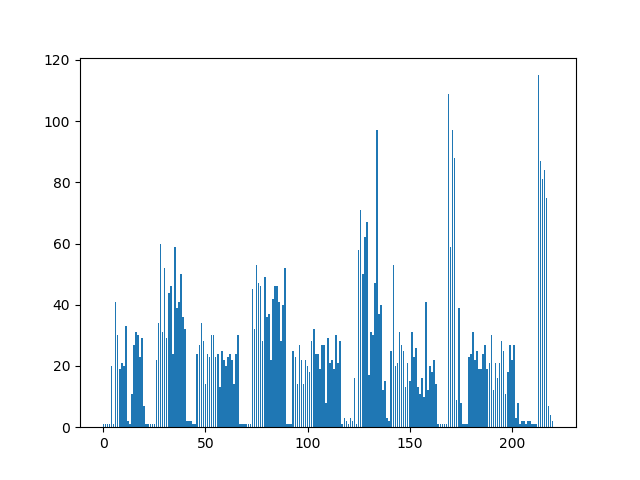

In [7]:
V_Area = []
for i in range(0, Nobjects):
    V_Area.append(stats[i, cv2.CC_STAT_AREA])
    
print(V_Area)
No_background = V_Area[:]

No_background.pop(0)

plt.figure('V_Area')

plt.bar(np.arange(len(V_Area)), V_Area)
plt.show()

plt.figure('No_background')
plt.bar(np.arange(len(No_background)), No_background)
#plt.xticks(np.arange(len(No_background)), rotation=90)
plt.show()

Analice la gráfica resultante y establezca un valor
de tamaño umbral que permita eliminar las regiones externas a las teclas. Justifique la
elección de este valor.
Construya de manera manual (no automática) un array uni-dimensional (vector) denominado
V_No_Interes, cuyos elementos correspondan a los valores de las etiquetas que desea
eliminar (filtrar). 

In [8]:
V_No_Interes = []

for i in range(0, Nobjects):
    if V_Area[i] <= 5:
        V_No_Interes.append(i)

print(V_No_Interes)

[1, 2, 3, 4, 6, 13, 14, 22, 23, 24, 25, 26, 42, 43, 44, 45, 46, 68, 69, 70, 71, 72, 73, 91, 92, 93, 118, 119, 120, 121, 122, 123, 125, 140, 141, 165, 166, 167, 168, 169, 177, 178, 179, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 220, 221]


Utilice la siguiente secuencia de comandos para filtrar, de la imagen binaria I_U, las
regiones de no interés.

n_filas, n_cols = size(I_U);
for ind_nfila=1:n_filas

    for ind_ncol=1:n_cols
    
        if I_U(ind_nfila,ind_ncol)
        
            numero_et = Seg_I_U(ind_nfila,ind_ncol);
            
            if sum(ismember(V_No_Interes,numero_et)) > 0
            
                I_U(ind_nfila,ind_ncol) = 0;
            end
        end
    end
end
Explique el fragmento de código anterior (se recomienda realizar un diagrama de flujo).
Visualice la imagen binaria resultante. En este punto debería tener al menos una región en el
interior de cada tecla y no debería haber píxeles de primer plano en el exterior de las teclas.
De no ser así, repita el proceso hasta conseguir el resultado deseado.

<IPython.core.display.Javascript object>


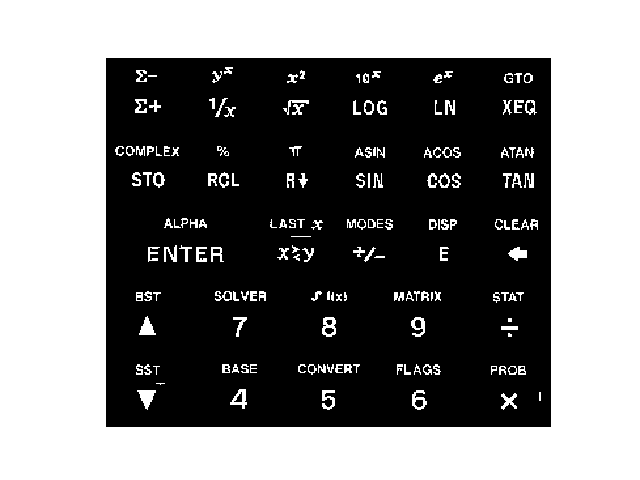

In [9]:
n_rows, n_cols = I_U.shape

for i in range(0, n_rows):
    for j in range(0, n_cols):
        label_number = Seg_I_U[i, j]
        if label_number in V_No_Interes:
            I_U[i,j] = 0

plt.figure('New Binary image')
plt.imshow(I_U, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

III. Procesado para identificación de la tecla ‘Enter’

Puesto que en el interior de las teclas puede haber uno, dos o más caracteres, y la distancia
entre ellos es relativamente pequeña (y siempre inferior a la distancia entre caracteres de
otras teclas), se propone procesar la imagen binaria I_U (resultante de la etapa anterior) para
agrupar en una misma región los caracteres asociados a la misma tecla, lo que permitiría
caracterizar cada tecla con una región diferente.
Para conseguir el objetivo anterior se propone realizar un filtrado espacial de media (con una
máscara de tamaño 5x5) sobre la imagen binaria I_U. Indique y justifique la secuencia de instrucciones utilizadas para definir la máscara y realizar el filtrado. Tenga en cuenta el tipo
de variable correspondiente a la imagen que se desea filtrar (probablemente ‘logical’) y de
salida (de tipo ‘uint8’). Almacene el resultado en la variable I_U_Fmedia. 

SI ENTRA BINARIA SALE BINARIA

<IPython.core.display.Javascript object>


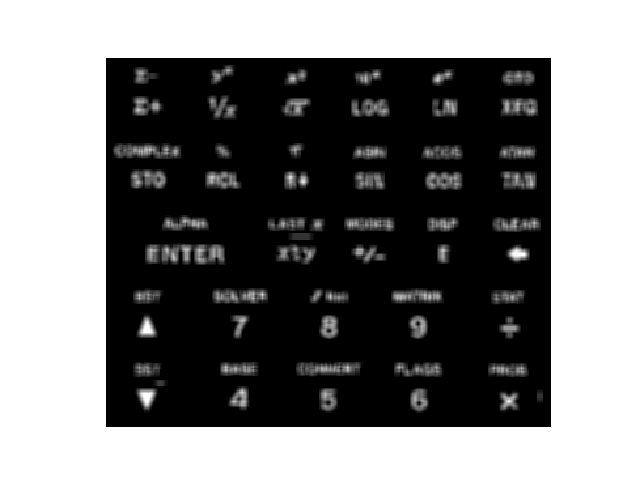

<IPython.core.display.Javascript object>


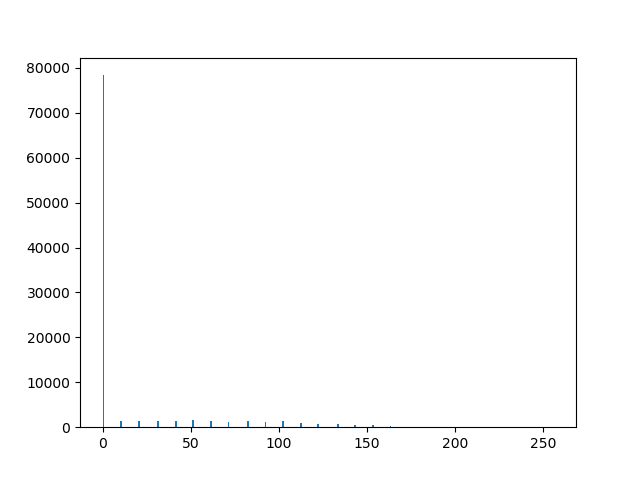

In [10]:
kernel = np.ones((5,5),np.float32)/(5*5)
I_U = I_U *255
I_U_Fmedia = cv2.filter2D(I_U, -1, kernel, borderType= cv2.BORDER_REFLECT)

plt.figure('Filter media')
plt.imshow(I_U_Fmedia, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

plt.figure('I_U_Fmedia histogram')
plt.hist(I_U_Fmedia.ravel(),256,[0,256]);

Aplique un umbral a la imagen I_U_Fmedia, de modo que sólo tengan valor nulo los
píxeles “suficientemente alejados” de las letras/números superpuestos a las teclas. Justifique
el umbral seleccionado y visualice la imagen binaria resultante (que denominaremos
I_U_Fmedia_Th). Utilice esta imagen para determinar automáticamente el número de teclas
(indique en la memoria la secuencia de instrucciones utilizada).
Haciendo uso de los comandos presentados y utilizados en esta práctica, proponga un
procedimiento para identificar automáticamente la localización de la tecla ‘Enter’ a partir de
I_U_Fmedia_Th.

In [11]:
[thresh, I_U_Fmedia_Th] = cv2.threshold(I_U_Fmedia, 1, 1, cv2.THRESH_BINARY)

plt.figure('New Binary image')
plt.imshow(I_U_Fmedia_Th, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

Implemente el procedimiento y proporcione como resultado una imagen I_Enter en escala
de grises y del mismo tamaño que la imagen original. La imagen I_Enter debe tener un
nivel de intensidad nulo en todos los píxeles salvo en los correspondientes a la región donde
se encuentra la tecla ‘Enter’, en cuyo caso debe mantenerse el nivel de intensidad de la
imagen original. Anote la secuencia de instrucciones utilizada. La imagen resultante debe ser
similar a la imagen de la Figura 1.
Justifique razonadamente qué habría sucedido si el tamaño de la máscara utilizada en el
filtrado espacial hubiera sido mucho mayor, por ejemplo 35x35.

<IPython.core.display.Javascript object>


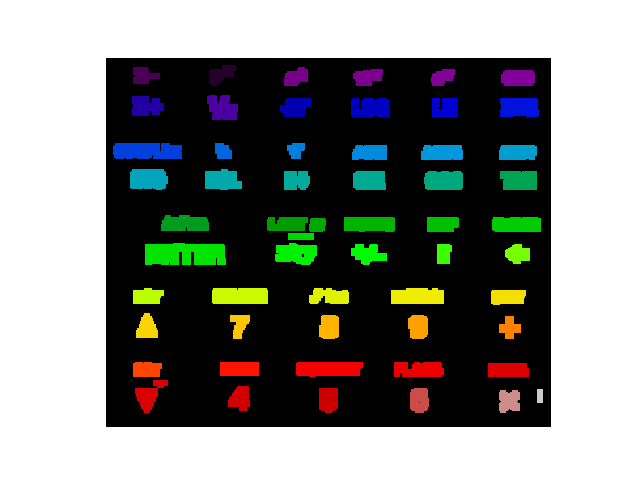

<IPython.core.display.Javascript object>


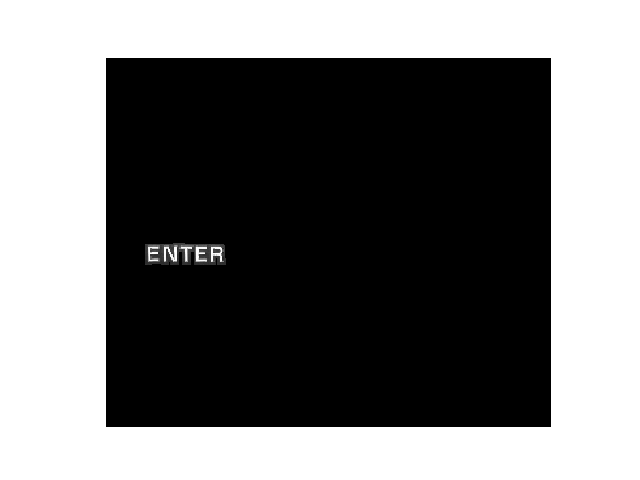

In [12]:
Nobjects_Enter, Seg_I_U_Enter, statsEnter, centroids=cv2.connectedComponentsWithStats(I_U_Fmedia_Th)

plt.figure('Segmented image enter')
plt.imshow(Seg_I_U_Enter, cmap=plt.cm.get_cmap('nipy_spectral'))
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

V_Area_Enter = []
for i in range(0, Nobjects_Enter):
    V_Area_Enter.append(statsEnter[i, cv2.CC_STAT_AREA])

In_Order = sorted(V_Area_Enter, reverse= True)

EnterArea = In_Order[1] #The biggest area is the background, the second biggest the enter key

EnterLabel = V_Area_Enter.index(EnterArea)

for i in range(0, n_rows):
    for j in range(0, n_cols):
        label_number = Seg_I_U_Enter[i, j]
        if label_number != EnterLabel:
            calculator[i,j] = 0

plt.figure('Enter image')
plt.imshow(calculator, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

